# The First Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook your are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. *Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Yaping Chen 379645
    2. Haikun Huang 391180
    3. Yu He 391644

## Preprocessing of the Dataset (5 points)
 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'population_density' dataset by random sampling.
     - Use one of the group member's student number as a seed.
 - Add another column to the dataset:
     - Name it 'population_density_categorical'.
     - The values in this column depend on values in 'population_density' column and will be defined as follows:
        - 5824=<population density              corresponding value in 'population_density_categorical' column: 'very high'
        - 4368=<population density<5824         corresponding value in 'population_density_categorical' column: 'high'
        - 2912=<population density<4368         corresponding value in 'population_density_categorical' column: 'medium'
        - 1456=<population density<2912         corresponding value in 'population_density_categorical' column: 'low' 
        - population density<1456               corresponding value in 'population_density_categorical' column: 'very low'
 - After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from p_decision_tree.DecisionTree import DecisionTree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
data_pop = pd.read_csv("population_density.csv", delimiter=',')
df_pop = pd.DataFrame(data_pop).sample(frac=0.9, random_state=391180)
max = df_pop['population_density'].max()
df_pop['population_density_categorical'] = pd.cut(
    df_pop.population_density,
    bins=[0, 1456, 2912, 4368, 5824, max + 1],
    labels=['very low', 'low', 'medium', 'high', 'very high'],
    right=False)  # default is ( ] , right=False means [ )
# df_pop.to_csv("population_density_categorical.csv")

## Question 1 - Insights into the Data (20 points):

### Dealing with Outliers (10 points)
   (a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should  have two datasets (cleaned and original).

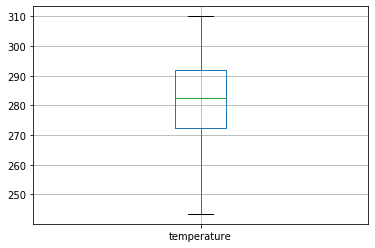

In [4]:
data_pop = pd.read_csv("population_density_categorical.csv", delimiter=',')
df_pop = pd.DataFrame(data_pop)
df_pop_original = df_pop

Q1 = df_pop['temperature'].quantile(0.25)
Q3 = df_pop['temperature'].quantile(0.75)
IQR = Q3 - Q1
filter = (df_pop['temperature'] >= Q1 - 1.5 * IQR) & (df_pop['temperature'] <=
                                                      Q3 + 1.5 * IQR)
df_pop_cleaned = df_pop.loc[filter]
# df_pop.boxplot(column=['temperature'])
df_pop_cleaned.boxplot(column=['temperature'])

   (b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets.    Interpret the differences for these statistical values between the cleaned and original datasets. 

In [5]:
# df_pop_cleaned
mean_cleaned = df_pop_cleaned.temperature.mean()
median_cleaned = df_pop_cleaned.temperature.median()
mode_cleaned = df_pop_cleaned.temperature.mode()
# df_pop_original
mean_original = df_pop_original.temperature.mean()
median_original = df_pop_original.temperature.median()
mode_original = df_pop_original.temperature.mode()
# difference
diff_mean = mean_original - mean_cleaned
diff_median = median_original - median_cleaned
diff_mode = mode_original - mode_cleaned

print(
    f'mean: \n original= {mean_original} ,\n cleaned= {mean_cleaned} ,\n difference = {diff_mean}'
)
print(
    f'median:\n original= {median_original} ,\n cleaned= {median_cleaned} ,\n difference = {diff_median}'
)
print(
    f'mode:\n original= {mode_original} ,\n cleaned= {mode_cleaned} ,\n difference = {diff_mode}'
)

# When we calculate the mean value, outliers are calculated by algorithm,but the up outliers and down outliers are both filterd
# the value change not so much.
# The value of median means the value in the center of all sorted dataset, as we filtered out some outliers, so the median is also chaned.
# As the amount of outliers are quiet small, so the result of median is always the same.

mean: 
 original= 281.2292325972709 ,
 cleaned= 281.2811007700111 ,
 difference = -0.05186817274022815
median:
 original= 282.48 ,
 cleaned= 282.49 ,
 difference = -0.009999999999990905
mode:
 original= 0    274.15
dtype: float64 ,
 cleaned= 0    274.15
dtype: float64 ,
 difference = 0    0.0
dtype: float64


   (c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing    outliers?

In [6]:
# Your code:
print('The number of outliers = ',df_pop_original.shape[0] - df_pop_cleaned.shape[0])

The number of outliers =  8


### Basic Visualization (10 points)
   (d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify    the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.

# discuss something 'Specify the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.'

The mean of population_density =  881.4
The median of population_density =  833.0
The max_value of population_density =  1538
The min_value of population_density =  455


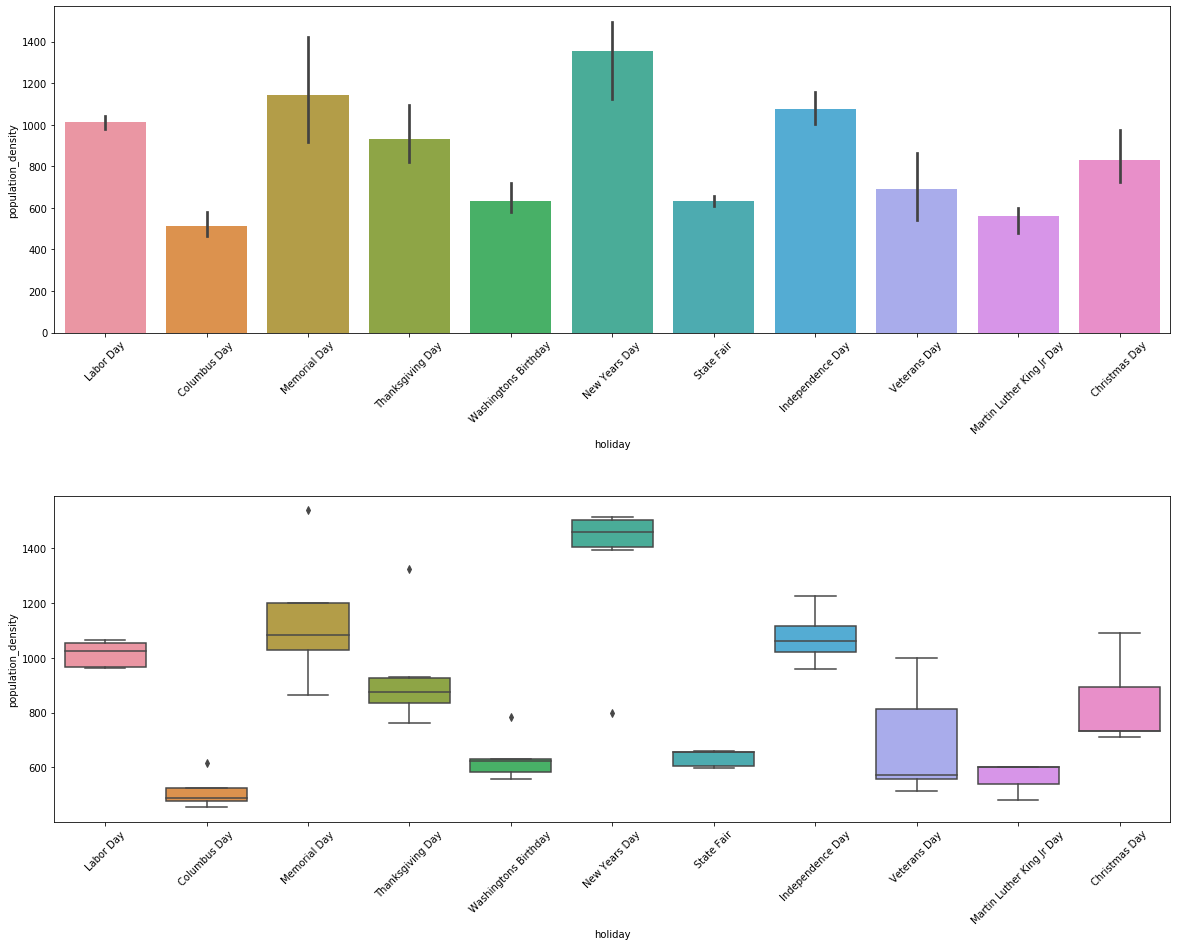

In [7]:
# Your code:
col_pop_original_holiday = df_pop_original[~df_pop_original['holiday'].isin(['None'])] #filter out the row of 'None' in column 'holiday'
# print(col_pop_original_holiday.shape[0])
mean_col_pop_original_holiday_pop = col_pop_original_holiday['population_density'].mean()
median_col_pop_original_holiday_pop = col_pop_original_holiday['population_density'].median()
max_col_pop_original_holiday_pop = col_pop_original_holiday['population_density'].max()
min_col_pop_original_holiday_pop = col_pop_original_holiday['population_density'].min()

print('The mean of population_density = ',mean_col_pop_original_holiday_pop)
print('The median of population_density = ',median_col_pop_original_holiday_pop)
print('The max_value of population_density = ',max_col_pop_original_holiday_pop)
print('The min_value of population_density = ',min_col_pop_original_holiday_pop)

fig,ax=plt.subplots(2,1,figsize=(20,15))
plt.subplots_adjust(wspace = 0, hspace = 0.5) #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# plt.figure(figsize=(15,10))
# plt.xticks(rotation=70)
for tick in ax[0].get_xticklabels():
        tick.set_rotation(45)
for tick in ax[1].get_xticklabels():
        tick.set_rotation(45)

sns.barplot(x="holiday", y="population_density", data=col_pop_original_holiday,ax=ax[0])
sns.boxplot(x = "holiday", y = "population_density", data=col_pop_original_holiday,ax=ax[1])


   (e) Plot the distribution of "temperature" in the original and cleaned datasets.

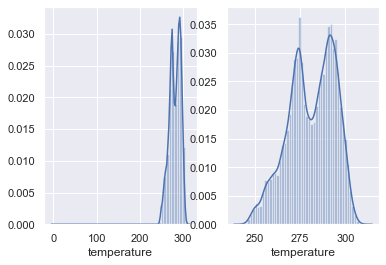

In [8]:
# Your code:
sns.set(color_codes=True)

pltfig,axes=plt.subplots(1,2)
sns.distplot(df_pop_original['temperature'],ax=axes[0])
sns.distplot(df_pop_cleaned['temperature'],ax=axes[1])

   (f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.

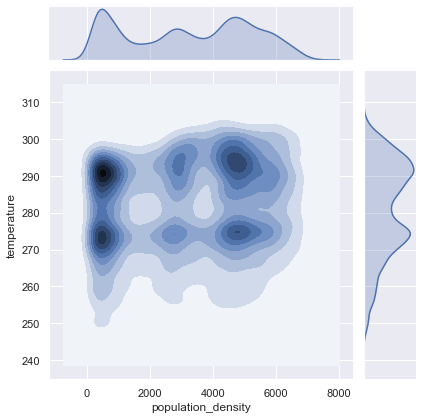

In [9]:
# Your code:

df_pop_cleaned_pop_a_temp = pd.DataFrame(df_pop_cleaned, columns=["population_density", "temperature"])
sns.jointplot(x="population_density", y="temperature", data=df_pop_cleaned_pop_a_temp, kind="kde");  #kind= scatter, hex, reg,kde 


## Question 2 - Decision Trees (15 points):


(a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it                "temperature_categorical":
        - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
        - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
        - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [9]:
# Your code:
df_pop_cleaned = df_pop_cleaned.copy()
Q1_temp = df_pop_cleaned['temperature'].quantile(0.25)
Q3_temp = df_pop_cleaned['temperature'].quantile(0.75)

df_pop_cleaned['temperature_categorical'] = np.nan
df_pop_cleaned.loc[df_pop_cleaned.temperature <= Q1_temp, 'temperature_categorical'] = 'low'
df_pop_cleaned.loc[(df_pop_cleaned.temperature > Q1_temp) & (df_pop_cleaned.temperature < Q3_temp), 'temperature_categorical'] = 'medium'
df_pop_cleaned.loc[df_pop_cleaned.temperature >= Q3_temp, 'temperature_categorical'] = 'high'
#print(df_pop_cleaned.shape)

   (b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples  for splitting to 5000 and make a decision tree based on entropy.

In [10]:
# Your code:
from p_decision_tree.DecisionTree import DecisionTree

data = df_pop_cleaned[['holiday','temperature_categorical','weather_type','population_density_categorical']].copy()
columns = data.columns

#All columns except the last one are descriptive by default
descriptive_features = columns[:-1]
#The last column is considered as label
label = columns[-1]

#Converting all the columns to string
for column in columns:
    data[column]= data[column].astype(str)

data_descriptive = data[descriptive_features].values
data_label = data[label].values

print("descriptive features:")
print(descriptive_features)
print("\ntarget feature:\n" + label)

#Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,5000)

#Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree( render=True )

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))


descriptive features:
Index(['holiday', 'temperature_categorical', 'weather_type'], dtype='object')

target feature:
population_density_categorical
System entropy:  2.2323093016318403
System gini:  None


# <font color=red>id3, gini,why no figure todo latter!</font>

(c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3?  

# <font color=red>todo</font>

Explanation: 


## Question 3 - Regression (10 points):

For this question (Q3), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density*. Drop the information on the date for *date_time* and restrict the data to time values (hour) only.

We define *population_density* to be our target feature, while all other features are considered descriptive.

In [18]:
# Your code:

from sklearn.linear_model import LinearRegression

data_pop_3 = data_pop.copy()
data_pop_3 = data_pop_3[['holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'date_time', 'population_density']]
temp = pd.DatetimeIndex(data_pop_3['date_time'])
data_pop_3['time'] =  temp.hour
data_pop_3 = data_pop_3.drop(['date_time'], axis=1)
data_pop_3


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,population_density,time
0,None,277.79,0.0,0.0,1,304,4
1,None,290.33,0.0,0.0,90,6382,16
2,None,300.40,0.0,0.0,1,4723,13
3,None,289.69,0.0,0.0,1,2415,21
4,None,283.30,0.0,0.0,90,4335,18
...,...,...,...,...,...,...,...
43379,None,251.15,0.0,0.0,1,480,2
43380,None,299.42,0.0,0.0,40,5399,12
43381,None,274.21,0.0,0.0,75,4976,11
43382,None,299.90,0.0,0.0,20,5168,18


   (a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

Explanation: <br>
temperature, rain_1h, snow_1h, clouds_percentage and time are sutiable as an input, because all feature are the  number. <br>
But holiday must be modified first by dummy-code, for categorical column because holiday is categorical descriptive feature.

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

In [19]:
# Your code:
df_holiday = pd.get_dummies(data_pop_3['holiday'])
# data_pop_3 = data_pop_3.drop(['holiday'],axis = 1)
data_pop_3 = data_pop_3.join(df_holiday)
data_pop_3.head(2)

,holiday,temperature,rain_1h,snow_1h,clouds_percentage,population_density,time,Christmas Day,Columbus Day,Independence Day,Labor Day,Martin Luther King Jr Day,Memorial Day,New Years Day,None,State Fair,Thanksgiving Day,Veterans Day,Washingtons Birthday
0,None,277.79,0.0,0.0,1,304,4,0,0,0,0,0,0,0,1,0,0,0,0
1,None,290.33,0.0,0.0,90,6382,16,0,0,0,0,0,0,0,1,0,0,0,0


(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

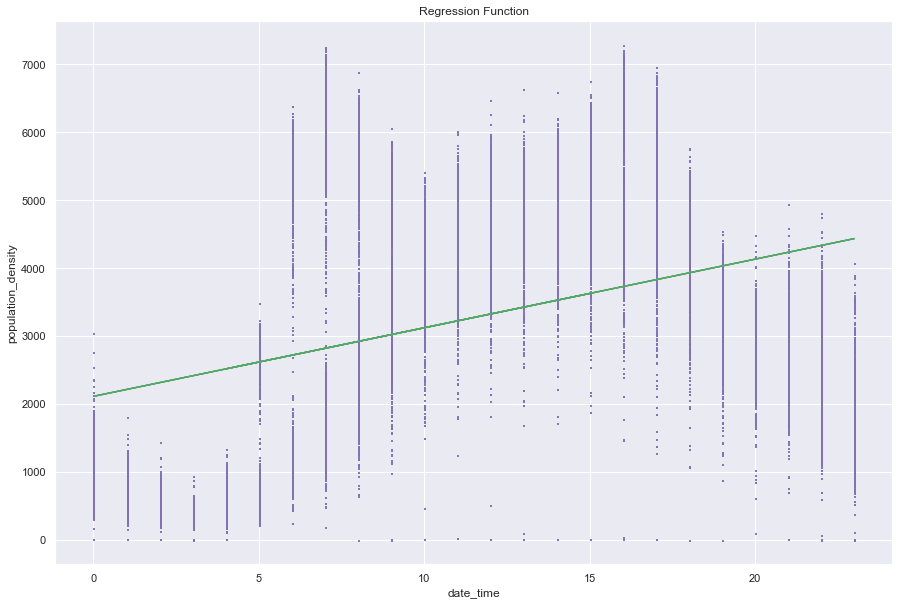

In [20]:
# Your code:

#define the classifier
classifier = LinearRegression()

#train the classifier
model = classifier.fit(data_pop_3[['time']], data_pop_3[['population_density']])
y_pred = classifier.predict(data_pop_3[['time']])

plt.figure(figsize=(15,10))
plt.scatter(data_pop_3[['time']], data_pop_3[['population_density']], color = "m", marker = "s", s = 1)
plt.plot(data_pop_3[['time']], y_pred, color = "g") 
plt.xlabel('date_time') 
plt.ylabel('population_density')
plt.title('Regression Function')
plt.show()


   (d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets *RegA, RegB*. Include these data sets in the submitted data set zip file. 
   
   Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

In [22]:
# Your code:

from sklearn.model_selection import train_test_split

# random split
train_set_rand, test_set_rand = train_test_split(data_pop_3, test_size=0.5, random_state=42)
train_set_rand

# stratify split
train_set_stratify, test_set_stratify = train_test_split(data_pop_3, stratify = data_pop_3['holiday'], test_size=0.5, random_state=42)
train_set_stratify

# train_set_rand.to_csv("RegA.csv")
# train_set_stratify.to_csv("RegB.csv")

Explanation:
I use random and stratified sampling in order to reduce the size of dataset.<br>
The stratified sampling is better because it takes the same percentage from every holiday group.

   (e) Train a linear regression classifier based on each of the two sample data sets *RegA, RegB* created before.

In [23]:
# Your code:
data_regA = pd.read_csv("RegA.csv",delimiter=',')
df_regA = pd.DataFrame(data_regA)

data_regB = pd.read_csv("RegB.csv",delimiter=',')
df_regB = pd.DataFrame(data_regB)

from sklearn.linear_model import LinearRegression

#define the classifier
classifier_regA = LinearRegression()
#train the classifier
model_regA = classifier_regA.fit(df_regA[['time']], df_regA['population_density'])
#use the trained classifier to make prediction
y_pred_regA = classifier_regA.predict(df_regA[['time']])

#define the classifier
classifier_regB = LinearRegression()
#train the classifier
model_regB = classifier_regB.fit(df_regB[['time']], df_regB['population_density'])
#use the trained classifier to make prediction
y_pred_regB = classifier_regB.predict(df_regB[['time']])



(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

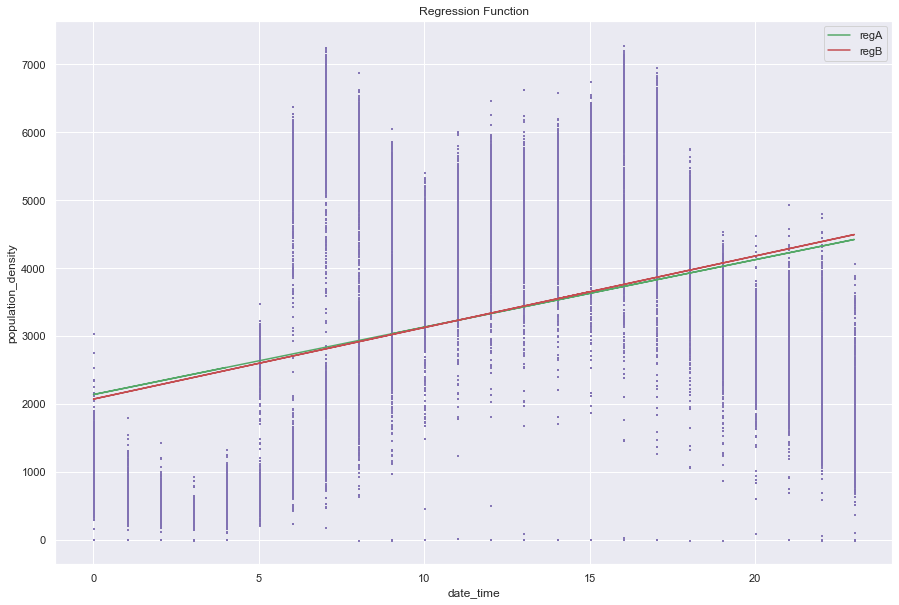

In [26]:
# Your code:

plt.figure(figsize=(15,10))
#visualize original data points
plt.scatter(data_pop_3[['time']], data_pop_3[['population_density']], color = "m", marker = "s", s = 1)
#visualize regression function
plt.plot(df_regA[['time']], y_pred_regA, color = "g", label = "regA")
plt.plot(df_regB[['time']], y_pred_regB, color = "r", label = "regB")
plt.xlabel('date_time') 
plt.ylabel('population_density')
plt.title('Regression Function')
plt.legend(loc = "best")
plt.show()


   (g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

RegA Mean squared error: 4463045.944020415

RegA Mean absolute error: 1819.4366034606549

RegA Median absolute error: 1793.1676001521478


RegB Mean squared error: 4521477.3612134615

RegB Mean absolute error: 1824.5571939678089

RegB Median absolute error: 1777.8211526185253



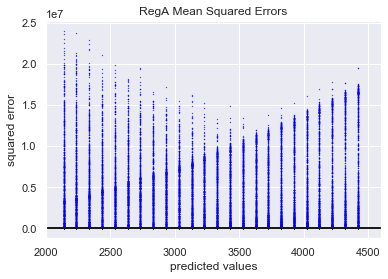

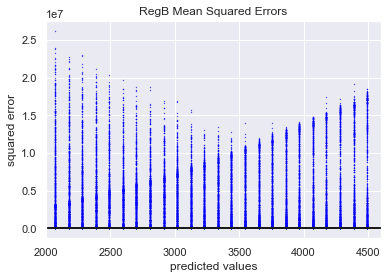

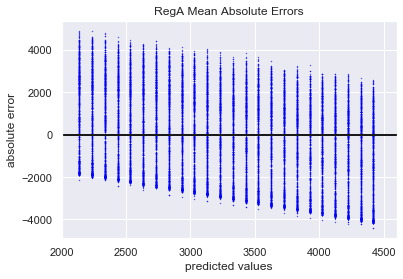

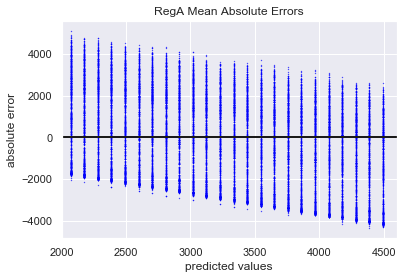

In [28]:
# Your code:

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

print("RegA Mean squared error:",mean_squared_error(data_pop_3['population_density'][:len(y_pred_regA)], y_pred_regA))
print()
print("RegA Mean absolute error:",mean_absolute_error(data_pop_3['population_density'][:len(y_pred_regA)], y_pred_regA))
print()
print("RegA Median absolute error:",median_absolute_error(data_pop_3['population_density'][:len(y_pred_regA)], y_pred_regA))
print()
print()
print("RegB Mean squared error:",mean_squared_error(data_pop_3['population_density'][:len(y_pred_regB)], y_pred_regB))
print()
print("RegB Mean absolute error:",mean_absolute_error(data_pop_3['population_density'][:len(y_pred_regB)], y_pred_regB))
print()
print("RegB Median absolute error:",median_absolute_error(data_pop_3['population_density'][:len(y_pred_regB)], y_pred_regB))
print()


plt.scatter(y_pred_regA, (data_pop_3['population_density'][:len(y_pred_regA)] - y_pred_regA) ** 2, color = "blue", s = 0.1) 
plt.title("RegA Mean Squared Errors")
## plotting line for zero error 
plt.hlines(y = 0, xmin = 2000, xmax = 4600, linewidth = 2)
plt.xlim((2000, 4600))
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

plt.scatter(y_pred_regB, (data_pop_3['population_density'][:len(y_pred_regB)] - y_pred_regB) ** 2, color = "blue", s = 0.1) 
plt.title("RegB Mean Squared Errors")
## plotting line for zero error 
plt.hlines(y = 0, xmin = 2000, xmax = 4600, linewidth = 2)
plt.xlim((2000, 4600))
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

plt.scatter(y_pred_regA, (data_pop_3['population_density'][:len(y_pred_regA)] - y_pred_regA), color = "blue", s = 0.1,) 
plt.title("RegA Mean Absolute Errors")
plt.hlines(y = 0, xmin = 2000, xmax = 4600, linewidth = 2)
plt.xlim((2000, 4600))
plt.xlabel('predicted values')
plt.ylabel('absolute error')
plt.show()

plt.scatter(y_pred_regB, (data_pop_3['population_density'][:len(y_pred_regB)] - y_pred_regB), color = "blue", s = 0.1,) 
plt.title("RegA Mean Absolute Errors")
plt.hlines(y = 0, xmin = 2000, xmax = 4600, linewidth = 2)
plt.xlim((2000, 4600))
plt.xlabel('predicted values')
plt.ylabel('absolute error')
plt.show()

<font color=red size=5>missing the median squared error?</font>

   (h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

# <font color=red>todo</font>

Explanation:


## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density_categorical*. For *date_time*, drop the information on the date and restrict the data to time values only.
We define *population_density_categorical* to be our target feature, while all other features are considered descriptive.


In [5]:
# Your code:

from sklearn.linear_model import LinearRegression

data_pop_4 = data_pop.copy()
data_pop_4 = data_pop_4[['holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'date_time', 'population_density_categorical']]
temp = pd.DatetimeIndex(data_pop_4['date_time'])
data_pop_4['time'] =  temp.hour
data_pop_4 = data_pop_4.drop(['date_time'], axis=1)
display(data_pop_4.head())


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,population_density_categorical,time
0,None,277.79,0.0,0.0,1,very low,4
1,None,290.33,0.0,0.0,90,very high,16
2,None,300.40,0.0,0.0,1,high,13
3,None,289.69,0.0,0.0,1,low,21
4,None,283.30,0.0,0.0,90,medium,18


   (a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

In [6]:
# Your code:

df_holiday = pd.get_dummies(data_pop_4['holiday'])
# df_pop_cat = pd.get_dummies(data_pop_4['population_density_categorical'])
# data_pop_3 = data_pop_3.drop(['holiday'],axis = 1)
data_pop_4 = data_pop_4.join(df_holiday)
# data_pop_4 = data_pop_4.join(df_pop_cat)
data_pop_4.head(2)


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,population_density_categorical,time,Christmas Day,Columbus Day,Independence Day,Labor Day,Martin Luther King Jr Day,Memorial Day,New Years Day,None,State Fair,Thanksgiving Day,Veterans Day,Washingtons Birthday
0,None,277.79,0.0,0.0,1,very low,4,0,0,0,0,0,0,0,1,0,0,0,0
1,None,290.33,0.0,0.0,90,very high,16,0,0,0,0,0,0,0,1,0,0,0,0


Explanation:<br>
The population_density_categorical is good als feature input for SVM, but the value of population_density_categorical must be dummy-code because population_density_categorical is categorical descriptive feature.

   (b) Divide the data set into a training set *svmTrain* and a test set *svmTest* and briefly motivate your division      strategy. Include these data sets in the data set zip file you submit. 
   
   Hint: Training the SVMs will take longer for a large training set!

In [7]:
# Your code:

from sklearn.model_selection import train_test_split

# random split
svmTrain, svmTest = train_test_split(data_pop_4, test_size=0.25, random_state=42)
svmTrain = svmTrain.drop(['holiday'],axis=1)
svmTest = svmTest.drop(['holiday'],axis=1)

# svmTrain.to_csv("svmTrain.csv", index=False)
# svmTest.to_csv("svmTest.csv", index=False)

Explanation:<br>
I divide all the dataset into 75% as training set and 25% as testing set.

   (c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters *kernel* and *C*.

In [28]:
# Your code:

data_svmTrain = pd.read_csv("svmTrain.csv",delimiter=',')
df_svmTrain = pd.DataFrame(data_svmTrain)

# df_svmTrain = df_svmTrain[:5000]

# data_svmTest = pd.read_csv("svmTest.csv",delimiter=',')
# df_svmTest = pd.DataFrame(data_svmTest)

#prepare input data
features = df_svmTrain.columns.tolist()
features.remove('population_density_categorical')

X4 = df_svmTrain[features]
y4 = df_svmTrain['population_density_categorical']

from sklearn.svm import SVC

classifier_1 = SVC(C=1, kernel='linear', gamma='scale') # kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
classifier_1.fit(X4, y4)
pred_1 = classifier_1.predict(X)

classifier_2 = SVC(C=1, kernel='poly', gamma='scale') # kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
classifier_2.fit(X4, y4)
pred_2 = classifier_2.predict(X4)

classifier_3 = SVC(C=0.5, kernel='linear', gamma='scale') # kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
classifier_3.fit(X4, y4)
pred_3 = classifier_3.predict(X4)

# print('Indicies of support vectors: \n', classifier.support_, '\n ') #indicies of support vectors
# print('Support vectors: \n ', classifier.support_vectors_, '\n ') #the support vectors
# print('Number of support vectors for each class: \n ', classifier.n_support_, '\n ') #the number of support vectors for each class


   (d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [12]:
# Your code:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Mean accuracy_1: \n', accuracy_score(y, pred_1), '\n')
print('Classification Report_1: \n', classification_report(y, pred_1), '\n')
print()
print('Mean accuracy_2: \n', accuracy_score(y, pred_2), '\n')
print('Classification Report_2: \n', classification_report(y, pred_2), '\n')
print()
print('Mean accuracy_3: \n', accuracy_score(y, pred_3), '\n')
print('Classification Report_3: \n', classification_report(y, pred_3), '\n')

Mean accuracy_1: 
 0.5728379125945049 



C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report_1: 
               precision    recall  f1-score   support

        high       0.61      0.74      0.67      9126
         low       0.44      0.35      0.39      5080
      medium       0.38      0.37      0.37      6152
   very high       0.00      0.00      0.00      3271
    very low       0.69      0.88      0.77      8909

    accuracy                           0.57     32538
   macro avg       0.42      0.47      0.44     32538
weighted avg       0.50      0.57      0.53     32538
 


Mean accuracy_2: 
 0.5716393140328232 

Classification Report_2: 
               precision    recall  f1-score   support

        high       0.59      0.76      0.67      9126
         low       0.44      0.33      0.38      5080
      medium       0.38      0.36      0.37      6152
   very high       0.00      0.00      0.00      3271
    very low       0.70      0.87      0.78      8909

    accuracy                           0.57     32538
   macro avg       0.42      0.46 

   (e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

<font color=red size=5>Explanation:</font>


## Question 5 - Neural Networks (20 points)
In this question consider the whole dataset that you have created in the *Preprocessing of Dataset* section. The target feature is *population_density_categorical*. 

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

In [186]:
# seprate data
data_pop_5 = pd.read_csv("population_density_categorical.csv", delimiter=',')
data_pop_5 = data_pop_5.head(4000)

   (a) What are the possible inputs of your network?
     - Show the possible extracted features.
     - Show the number of possible patterns of inputs for the categorical data.

In [189]:

# restrict to the first 4000 row of data set
df_pop_5 = pd.DataFrame(data_pop_5)
print('Input features in dataset population_density _categorical: ')
input_features = df_pop_5.columns.values[:-1]
print(input_features)
print('\n')

# get data type
print("Data type for different features:")
input_data=df_pop_5[input_features]
print(input_data.dtypes)
print('\n')

#normalize the numerical features:
num_data = input_data[['temperature','rain_1h','snow_1h','clouds_percentage','population_density']]
minmaxscaler = MinMaxScaler()
#keep the column and index name 
norm_num = num_data.copy(deep=True)
norm_num.loc[:,:]=  minmaxscaler.fit_transform(num_data)

# applay one hot encoding to categorical features:
cate_data = input_data[['holiday','weather_type', 'weather_type_details','date_time']]
onehot_data = pd.get_dummies(cate_data)


# get the pattern number after apply one hot encoding to categorical feature.
print('The number of patterns: ',onehot_data.shape[1])


Input features in dataset population_density _categorical: 
['holiday' 'temperature' 'rain_1h' 'snow_1h' 'clouds_percentage'
 'weather_type' 'weather_type_details' 'date_time' 'population_density']


Data type for different features:
holiday                  object
temperature             float64
rain_1h                 float64
snow_1h                 float64
clouds_percentage         int64
weather_type             object
weather_type_details     object
date_time                object
population_density        int64
dtype: object


The number of patterns:  3974


**Explanation:** <br>
All the features except for the target feature and the random seed are possible inputs for neural network. but we need to do some modifications:
first of all because the NN only takes the numerical values, the categorical descriptive features need to be convert to numerical ones. besides, it's better to normalize the input.

There are 4 descriptive categoraical features i.e 'holiday',
'weather_type', 'weather_type_details' and 'date_time' in the dataset.When we  applay one hot encoding to these featruese, we can get the number of possible pattern is 3974. The number is so huge just because we also consider the date information for the time. Each of the differnt date-time will be consider as a  
category.

   (b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? 
     - Your explanation should be supported by data.

**Explanation:**<br> 
No. I think it's too trivial to consider all the date information. it will make the neural network get much more useless information. increase the computation time for training the network. and the result also tends to overfitting. Instead of using date time, if we do some processing as the task 4, just consider the time information, the number of patterns will from 37095 reduces to 47 (see following rusult). I think in these way it will makes more sense, reduce the training time and improve the accuracy. 
In another view, NN are trained on training data, there exist bias, perfectly fit the training data will leads to overfitting. more independent data make the result better.

In [190]:
# keep only time information in date time.
cate_data_wo_date = cate_data.copy(deep=True)
temp = pd.DatetimeIndex(cate_data['date_time'])
cate_data_wo_date['time'] =  temp.hour
cate_data_wo_date.drop(['date_time'], axis=1)

# applay one hot encoding
onehot_data_wo_dt = pd.get_dummies(cate_data_wo_date[['holiday',
 'weather_type', 'weather_type_details','time']])
print('Without consider date information, the number of paterns is reduce to: ',onehot_data_wo_dt.shape[1])


Without consider date information, the number of paterns is reduce to:  47


   (c) Which features can be used for designing your network as inputs? Why?
       - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
       - Convert the features. 

**Explanation:**<br>
As i described in the solution for task 5(a) following features: holiday,weather_type,weather_type_details, date_time, should be changed, because they are descriptive features, but the NN only takes numerical values.
we just use one hot encoding for these features(refer to task 5(a)). 

furthermore i only extract the time information in the data_time feature.(refer to task 5(b))

finally, we need do some normalization for the numerical parts(refer to taks 5(a))

In [191]:
display(onehot_data_wo_dt.head())
display(norm_num.head())

,time,holiday_Columbus Day,holiday_Labor Day,holiday_None,weather_type_Clear,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,...,weather_type_details_shower snow,weather_type_details_sky is clear,weather_type_details_smoke,weather_type_details_snow,weather_type_details_thunderstorm,weather_type_details_thunderstorm with heavy rain,weather_type_details_thunderstorm with light drizzle,weather_type_details_thunderstorm with light rain,weather_type_details_thunderstorm with rain,weather_type_details_very heavy rain
0,4,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,16,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,13,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,21,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,18,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,temperature,rain_1h,snow_1h,clouds_percentage,population_density
0,0.500562,0.0,0.0,0.01,0.042640
1,0.702073,0.0,0.0,0.90,0.897974
2,0.863892,0.0,0.0,0.01,0.664509
3,0.691789,0.0,0.0,0.01,0.339713
4,0.589105,0.0,0.0,0.90,0.609907


   (d) Train your network with default hyperparameters and return the parameters.

In [192]:
from sklearn.neural_network import MLPClassifier

# join normalized numerical data and one hot encoded descriptive features.
X5 = norm_num.join(onehot_data_wo_dt)
display(X5.head())

# one hot encoding for target feature
y = df_pop_5.iloc[:,-1]
y5 = pd.get_dummies(y) 
display(y5.head())


,temperature,rain_1h,snow_1h,clouds_percentage,population_density,time,holiday_Columbus Day,holiday_Labor Day,holiday_None,weather_type_Clear,...,weather_type_details_shower snow,weather_type_details_sky is clear,weather_type_details_smoke,weather_type_details_snow,weather_type_details_thunderstorm,weather_type_details_thunderstorm with heavy rain,weather_type_details_thunderstorm with light drizzle,weather_type_details_thunderstorm with light rain,weather_type_details_thunderstorm with rain,weather_type_details_very heavy rain
0,0.500562,0.0,0.0,0.01,0.042640,4,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1,0.702073,0.0,0.0,0.90,0.897974,16,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.863892,0.0,0.0,0.01,0.664509,13,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0.691789,0.0,0.0,0.01,0.339713,21,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,0.589105,0.0,0.0,0.90,0.609907,18,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


,high,low,medium,very high,very low
0,0,0,0,0,1
1,0,0,0,1,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [ ]:
# fit data to model
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X5,y5)
print('Default hyperparameters:\n', mlp_classifier.get_params())

   (e) Try to find an optimized number of hidden layers and nodes. 
      - Start with default numbers and then at least go with one number above and one number below the default.
      - Use the 2000 rows of the data for training.
      - What are the optimized numbers of hidden layers and nodes that you have found?

In [ ]:
# split the specified the training set size to 2000
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=2000)
y5_train = pd.get_dummies(y_train) 
y5_test =  pd.get_dummies(y_test)
# save to csv
# X5_train.to_csv("NN_train_input.csv", index=False)
# X5_test.to_csv("NN_test_input.csv", index=False)
# y_train.to_csv("NN_train_target.csv", index=False)
# y_test.to_csv("NN_test_target.csv", index=False)

# reload data
# NN_train_input = pd.read_csv("NN_train_input.csv",delimiter=',')
# NN_train_target = pd.read_csv("NN_train_target.csv",delimiter=',')
# NN_test_input = pd.read_csv("NN_test_input.csv",delimiter=',')
# NN_test_target = pd.read_csv("NN_test_target.csv",delimiter=',')

# X5_train=pd.DataFrame(NN_train_input)
# y_train=pd.DataFrame(NN_train_target)
# y5_train = pd.get_dummies(y_train) 
# X5_test=pd.DataFrame(NN_test_input)
# y_test=pd.DataFrame(NN_test_target)
# y5_test =  pd.get_dummies(y_test)


In [196]:

X5_train = pd.read_csv("svmTrain.csv",delimiter=',')
df_svmTrain = pd.DataFrame(data_svmTrain)
from sklearn.model_selection import train_test_split

layer_scores={}
#default number of hidden layers
print('The default number of the hidden layers:', mlp_classifier.n_layers_ -2)

# go through from 0 to 5 hidden layers, find the max score
for i in range(5):
    mlp_classifier1 = MLPClassifier(hidden_layer_sizes=(100,)*i)
    mlp_classifier1.fit(X5_train,y5_train)
    layer_scores[i] = mlp_classifier1.score(X5_test,y5_test)

print('The layer number and correspoinding test accuracy:')
print(layer_scores)
# # find the layer number with max scores:
# max(layer_scores,key=layer_scores.get)

The default number of the hidden layers: 1


C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The layer number and correspoinding test accuracy:
{0: 0.232, 1: 0.663, 2: 0.923, 3: 0.9245, 4: 0.9235}


In [198]:
# Your code: (number of nodes in the hidden layer)
neuron_scores={}
for i in range(50,200,10):
    mlp_classifier2 = MLPClassifier(hidden_layer_sizes=(i,)*3)
    mlp_classifier2.fit(X5_train,y5_train)
    neuron_scores[i] = round(mlp_classifier2.score(X5_test,y5_test),6)
    
print(neuron_scores)
    


C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{50: 0.941, 60: 0.9385, 70: 0.9445, 80: 0.94, 90: 0.934, 100: 0.928, 110: 0.94, 120: 0.9385, 130: 0.918, 140: 0.927, 150: 0.92, 160: 0.9365, 170: 0.9225, 180: 0.941, 190: 0.9195}


In [203]:
# Your code: (optimized network) 
layer_number_opt = 3
neuron_number_opt = 70
mlp_classifier3 = MLPClassifier(hidden_layer_sizes=(neuron_number_opt,)*layer_number_opt)
mlp_classifier3.fit(X5_train,y5_train)
print('test data accuracy: ', mlp_classifier3.score(X5_test,y5_test))


test data accuracy:  0.9255


C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Explanation:**<br>
In our examples the optimal layer number is 3,and using this optimal layer number we get the optimal neuron number is . Based on that we get the optimal neuron number is around 70. so we get the optimal neuron network size. of course, onerun estimate is not enough. we'd better run algorithm in different training and test data set 10-20 times and to get the Mode of the optimal value for those repeat to achieve a more accuracy result. But we start to work on it late, for the time reason we don't do that. the idea is the same.

   (f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes.
     - Name the functions and explain how the results are different and why. 
     - You can use evaluation metrics to show which activation function works better for this data set.
     - Use the 2000 rows of the data for training.

In [204]:
# Your code: (linear activation function):
mlp_classifier4 = MLPClassifier(activation='identity')
mlp_classifier4.fit(X5_train,y5_train)
mlp_classifier4.score(X5_test,y5_test)


C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.4595

In [205]:
# Your code: (non-linear activation function):
mlp_classifier5 = MLPClassifier(activation='logistic')
mlp_classifier5.fit(X5_train,y5_train)
mlp_classifier5.score(X5_test,y5_test)



C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.498

**Explanation:**<br> 
'identity' returns the same value as input so it is linear, 'logistic' means we use sigmoid functions to change the input value.  According to above result we see that the non-linear version is slightly better than the linear one. there is no big difference i think that's because in the default setting, the hidden layer number is just 1. The non-linear activation function play a big role only on mulit-hiddenlayer neuron network.

## Question 6 - Evaluation (10 Points)

   (a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of *three* models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

In [206]:
#  svm dataset in task 4:
data_svmTrain = pd.read_csv("svmTrain.csv",delimiter=',')
data_svmTest = pd.read_csv("svmTest.csv",delimiter=',')
df_svmTrain = pd.DataFrame(data_svmTrain)
df_svmTest = pd.DataFrame(data_svmTest)
features = df_svmTrain.columns.tolist()
features.remove('population_density_categorical')

X4_train = df_svmTrain[features]
y4_train = df_svmTrain['population_density_categorical']
X4_test = df_svmTrain[features]
y4_test = df_svmTrain['population_density_categorical']

# SVM classifer
svm_classifier= SVC(C=1, kernel='poly',gamma='scale')

#  NN dataset in task 5:
NN_train_input = pd.read_csv("NN_train_input.csv",delimiter=',')
NN_train_target = pd.read_csv("NN_train_target.csv",delimiter=',')
NN_test_input = pd.read_csv("NN_test_input.csv",delimiter=',')
NN_test_target = pd.read_csv("NN_test_target.csv",delimiter=',')

X5_train=pd.DataFrame(NN_train_input)
y5_train=pd.DataFrame(NN_train_target)
X5_test=pd.DataFrame(NN_test_input)
y5_test=pd.DataFrame(NN_test_target)

# NN classifier
nn_opt_classifier = MLPClassifier(hidden_layer_sizes=(neuron_number_opt,)*layer_number_opt)
nn_nonlinear_classifier = MLPClassifier(activation='logistic')

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [182]:
# code for draw the confusion matrices 
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

def three_fold_confusion_matrix(classifier,X,y):
    con_mat={}
    folds = KFold(n_splits=3,shuffle=True)
    for i,(train_idx, test_idx) in enumerate(folds.split(X)):
        X_train,y_train,X_test,y_test = X.iloc[train_idx],y.iloc[train_idx],X.iloc[test_idx],y.iloc[test_idx]
        
        train = classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        
        con_mat[i] = confusion_matrix(y_test,y_pred,labels=['very low','low','medium','high','very high'])
        
    # sum cell by cell of these three fold
    return con_mat[0]+con_mat[1]+con_mat[2]
  

In [207]:
# On the training data

# draw confusion matrices on training set
svm_classifier= SVC(C=1, kernel='poly',gamma='scale')
svm_con_mat = three_fold_confusion_matrix(svm_classifier,X4_train,y4_train)
print("Confussion matrix on traniing data: ")
print('\n')
print('  svm with ploynomial kernel:')
print(svm_con_mat)

# draw confusion matrices on training set
nn_opt_classifier = MLPClassifier(hidden_layer_sizes=(neuron_number_opt,)*layer_number_opt)
nn_opt_con_mat = three_fold_confusion_matrix(nn_opt_classifier,X5_train,y_train)
print('  NN with optimal size:')
print(" ", nn_opt_con_mat)
nn_nonlinear_classifier = MLPClassifier(activation='logistic')
nn_nonlinear_con_mat = three_fold_confusion_matrix(nn_opt_classifier,X5[:50],y[:50])
print('  NN with nonlinear activaion functions:')
print(' ', nn_nonlinear_con_mat)


Confussion matrix on traniing data: 


  svm with ploynomial kernel:
[[7790  576  453   90    0]
 [1088 1549 1860  583    0]
 [ 403  957 2257 2535    0]
 [1015  313  851 6947    0]
 [ 917  179  528 1647    0]]


C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


  NN with optimal size:
  [[537  12   0   0   0]
 [ 15 315  16   0   0]
 [  0  28 319  20   0]
 [  0   0  11 516  13]
 [  0   0   0  18 180]]


C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


  NN with nonlinear activaion functions:
  [[16  4  0  0  0]
 [ 3  3  0  2  1]
 [ 0  1  0  1  4]
 [ 0  1  0  7  2]
 [ 0  0  1  4  0]]


C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

In [208]:
#  code for the confusion matrices on the test data

# draw confusion matrices on svm test set
svm_con_mat = three_fold_confusion_matrix(svm_classifier,X4_test,y4_test)
print("Confussion matrix on traniing data: ")
print('\n')
print('  svm with ploynomial kernel:')
print(svm_con_mat)


# draw confusion matrices on NN test set

nn_opt_con_mat = three_fold_confusion_matrix(nn_opt_classifier,X5_test,y5_test)
print('  NN with optimal size:')
print(' ', nn_opt_con_mat)

nn_nonlinear_con_mat = three_fold_confusion_matrix(nn_opt_classifier,X5_test,y5_test)
print('  NN with nonlinear activaion functions:')
print(' ', nn_nonlinear_con_mat)



Confussion matrix on traniing data: 


  svm with ploynomial kernel:
[[7789  417  611   92    0]
 [1090 1077 2330  583    0]
 [ 407  707 2503 2535    0]
 [1022  219  950 6935    0]
 [ 915  131  558 1667    0]]


IndexError: positional indexers are out-of-bounds

- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

In [210]:
# Your code for precision, recall and F1-scores on the test data
from sklearn.metrics import classification_report
def model_report(classifier, X, y):
    report={}
    folds = KFold(n_splits=3,shuffle=True)
    for i,(train_idx, test_idx) in enumerate(folds.split(X)):
        X_train,y_train,X_test,y_test = X.iloc[train_idx],y.iloc[train_idx],X.iloc[test_idx],y.iloc[test_idx]
        
        train = classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        report[i]= classification_report(y_test,y_pred,['very low', 'low', 'medium', 'high', 'very high'])
    return report
        


In [211]:
print('SVM with ploynomial kernel:')
report = model_report(svm_classifier,X4_test,y4_test)
print(' Fold 1:')
print(report[0])
print(' Fold 2:')
print(report[1])
print(' Fold 3:')
print(report[2])

print("NN with optimal size:")
report = model_report(nn_opt_classifier,X4_test,y4_test)
print(' Fold 1:')
print(report[0])
print(' Fold 2:')
print(report[1])
print(' Fold 3:')
print(report[2])

print('NN with nonlinear activaion functions:')
report = model_report(nn_nonlinear_classifier,X4_test,y4_test)
print(' Fold 1:')
print(report[0])
print(' Fold 2:')
print(report[1])
print(' Fold 3:')
print(report[2])

SVM with ploynomial kernel:


C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 Fold 1:
              precision    recall  f1-score   support

    very low       0.70      0.89      0.78      2975
         low       0.45      0.31      0.37      1686
      medium       0.38      0.37      0.37      2044
        high       0.59      0.77      0.67      3040
   very high       0.00      0.00      0.00      1101

    accuracy                           0.58     10846
   macro avg       0.43      0.47      0.44     10846
weighted avg       0.50      0.58      0.53     10846

 Fold 2:
              precision    recall  f1-score   support

    very low       0.69      0.86      0.77      2939
         low       0.42      0.33      0.37      1676
      medium       0.39      0.35      0.37      2096
        high       0.58      0.75      0.65      3051
   very high       0.00      0.00      0.00      1084

    accuracy                           0.56     10846
   macro avg       0.41      0.46      0.43     10846
weighted avg       0.49      0.56      0.52     10846

 Fol

C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


 Fold 1:
              precision    recall  f1-score   support

    very low       0.67      0.97      0.79      2911
         low       0.72      0.22      0.34      1702
      medium       0.49      0.44      0.46      2125
        high       0.57      0.79      0.67      3032
   very high       0.00      0.00      0.00      1076

    accuracy                           0.60     10846
   macro avg       0.49      0.48      0.45     10846
weighted avg       0.55      0.60      0.54     10846

 Fold 2:
              precision    recall  f1-score   support

    very low       0.90      0.82      0.86      2974
         low       0.56      0.57      0.56      1687
      medium       0.60      0.39      0.47      2016
        high       0.63      0.76      0.69      3062
   very high       0.48      0.61      0.54      1107

    accuracy                           0.66     10846
   macro avg       0.63      0.63      0.62     10846
weighted avg       0.67      0.66      0.66     10846

 Fol

C:\Users\unicorn\Anaconda3\envs\ds_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


 Fold 1:
              precision    recall  f1-score   support

    very low       0.94      0.81      0.87      2963
         low       0.61      0.61      0.61      1684
      medium       0.62      0.36      0.45      2019
        high       0.63      0.84      0.72      3097
   very high       0.51      0.63      0.56      1083

    accuracy                           0.68     10846
   macro avg       0.66      0.65      0.64     10846
weighted avg       0.70      0.68      0.68     10846

 Fold 2:
              precision    recall  f1-score   support

    very low       0.85      0.87      0.86      2912
         low       0.68      0.51      0.58      1723
      medium       0.62      0.34      0.44      2137
        high       0.61      0.78      0.68      2963
   very high       0.44      0.64      0.52      1111

    accuracy                           0.66     10846
   macro avg       0.64      0.63      0.62     10846
weighted avg       0.67      0.66      0.65     10846

 Fol

- Accuracy scores on training and test data (give explicitly the result for each fold)

In [212]:
# Your code for accuracy scores on training and test data
from sklearn.metrics import accuracy_score
def model_accuray_score(classifier, X, y):
    acc_score={}
    folds = KFold(n_splits=3,shuffle=True)
    for i,(train_idx, test_idx) in enumerate(folds.split(X)):
        X_train,y_train,X_test,y_test = X.iloc[train_idx],y.iloc[train_idx],X.iloc[test_idx],y.iloc[test_idx]
        
        train = classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        acc_score[i]= accuracy_score(y_test,y_pred,['very low', 'low', 'medium', 'high', 'very high'])
    return acc_score

In [214]:
print('SVM with ploynomial kernel:')
print(' traing data:')
acc_score = model_accuray_score(svm_classifier,X4_train,y4_train)
print('  Fold 1: ',acc_score[0])
print('  Fold 2: ',acc_score[1])
print('  Fold 3: ',acc_score[2])
print(' test data:')
acc_score = model_accuray_score(svm_classifier,X4_test,y4_test)
print('  Fold 1: ',acc_score[0])
print('  Fold 2: ',acc_score[1])
print('  Fold 3: ',acc_score[2])

print("NN with optimal size:")
print(' traing data:')
acc_score = model_accuray_score(nn_opt_classifier,X5_train,y5_train)
print('  Fold 1: ',acc_score[0])
print('  Fold 2: ',acc_score[1])
print('  Fold 3: ',acc_score[2])
print(' test data:')
acc_score = model_accuray_score(nn_opt_classifier,X5_test,y5_test)
print('  Fold 1: ',acc_score[0])
print('  Fold 2: ',acc_score[1])
print('  Fold 3: ',acc_score[2])


print('NN with nonlinear activaion functions:')
print(' traing data:')
acc_score = model_accuray_score(nn_nonlinear_classifier,X5_train,y5_train)
print('  Fold 1: ',acc_score[0])
print('  Fold 2: ',acc_score[1])
print('  Fold 3: ',acc_score[2])
acc_score = model_accuray_score(nn_nonlinear_classifier,X5_test,y5_test)
print('  Fold 1: ',acc_score[0])
print('  Fold 2: ',acc_score[1])
print('  Fold 3: ',acc_score[2])


SVM with ploynomial kernel:
 traing data:
  Fold 1:  0.5714549142541029
  Fold 2:  0.568781117462659
  Fold 3:  0.5607597270883274
 test data:
  Fold 1:  0.5717315139221832
  Fold 2:  0.570164115803061
  Fold 3:  0.5706251152498617
NN with optimal size:
 traing data:


IndexError: positional indexers are out-of-bounds

In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

**Explanation:**<br>
Compare the outcome above, the non-linear NN model is a better choice because the average accuracy of it is highst among these three networks. and compare each item in the report, generally NN with optimal size perform similiar with the NN with non-linear activation funciton and  better than SVM with polynomial kernel. In our special example case,compare each item, precision, recall and f1-scores in the report, non-linear NN is best one.  


   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

**Explanation:**<br>
When a model perform good on training data but poor on test data, then it is overfitted. When it perfoms bad on both training data and test data, then it is underfitted.
look at the accuray_score in task 6a for the SVM on both dataset it's predcitions are similar(both around 0.57) only slightly better than chance( 0.5), so i think in these sense it suffer from underfitting.<font size=5 color=red>continue, not sufficient data!</font>


   (d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

**Explanation:**<br>
When only a limit small training dataset is avalible. we can use cross validation to generate more avalible data, such as in K-fold we use apply k rounds of seperation, that is each data wil be use k-times. But this is also at risk of get dependency between data, and have more change to overfitting.